# Bean Disease Classifier
For this assignment you'll take what you've learned so far and build a classifier for bean disease. You'll be provided with training and validation data based on 224x224 pixel color images taken of bean plants in Uganda. These images show healthy bean leaves as well as 2 types of common disease: bean rust and angular leaf spots. Your job will be to build a neural network that can tell the difference between the healthy and diseased leaves.

We start by setting up the problem for you.


In [1]:
# Do not change this code
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [2]:
# Do not change this code
# !pip install --upgrade --no-cache-dir gdown

In [3]:
# Do not change this code
'''
!gdown "https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb" -O ./datasets/bean_disease/train.zip
!gdown "https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k" -O ./datasets/bean_disease/validation.zip
!gdown "https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m" -O ./datasets/bean_disease/test.zip
'''

'\n!gdown "https://drive.google.com/uc?export=download&id=1jSiS-2Wy0AaOg7F7trgAG-KtnVGm2oTb" -O ./datasets/bean_disease/train.zip\n!gdown "https://drive.google.com/uc?export=download&id=17zP0BYyYBqCgSpYqXjYhikjBVpkxmq8k" -O ./datasets/bean_disease/validation.zip\n!gdown "https://drive.google.com/uc?export=download&id=17TzNBWdjWGgVRyy7cHMzFWrOXvIhRz6m" -O ./datasets/bean_disease/test.zip\n'

In [4]:
# Do not change this code
import os
import zipfile
'''
local_zip = './datasets/bean_disease/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
local_zip = './datasets/bean_disease/validation.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./tmp')
local_zip = './datasets/bean_disease/test.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./datasets/bean_disease/test')
zip_ref.close()
'''

"\nlocal_zip = './datasets/bean_disease/train.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./tmp')\nlocal_zip = './datasets/bean_disease/validation.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./tmp')\nlocal_zip = './datasets/bean_disease/test.zip'\nzip_ref = zipfile.ZipFile(local_zip, 'r')\nzip_ref.extractall('./datasets/bean_disease/test')\nzip_ref.close()\n"

Now you need to define a generator to process the data we have loaded in Colab so that our model can use it for training. As we showed in the previous video you'll first have to define an ```ImageDataGenerator``` and then flow the data into it.

*A hint: You don't want abnormal data!*

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(
      rescale=1./255
)

test_datagen = ImageDataGenerator(
      rescale=1./255
)


TRAIN_DIRECTORY_LOCATION = 'datasets/bean_disease/train'
VAL_DIRECTORY_LOCATION = 'datasets/bean_disease/validation'
TEST_DIRECTORY_LOCATION = 'datasets/bean_disease/test'
TARGET_SIZE = (224,224)
CLASS_MODE = 'categorical'

train_generator = train_datagen.flow_from_directory(
        TRAIN_DIRECTORY_LOCATION,  # This is the source directory for training images
        target_size=TARGET_SIZE,  # All images will be resized to 224x224
        batch_size=32,
        class_mode=CLASS_MODE
)

validation_generator = validation_datagen.flow_from_directory(
    VAL_DIRECTORY_LOCATION,
    target_size = TARGET_SIZE,  
    batch_size = 32,
    class_mode = CLASS_MODE,
    shuffle = True
)

test_generator = test_datagen.flow_from_directory(
    directory= TEST_DIRECTORY_LOCATION,
    target_size=(224, 224),
    batch_size=1,
    class_mode=None,
    shuffle=False
)


Found 1034 images belonging to 3 classes.
Found 133 images belonging to 3 classes.
Found 128 images belonging to 1 classes.


Now its your turn to define a model to learn this data. 

*A hint: Like with the CIFAR-10 assignment, your model may want to learn some high level features and then classify them. This time it may help to make the model a little wider at times.*

In [6]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    # tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# This will print a summary of your model when you're done!
model.summary()

Metal device set to: Apple M1 Pro

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                        

2022-05-12 00:55:32.347498: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-12 00:55:32.347651: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Then you'll need to pick an appropriate loss function and optimizer.

*A hint: remember we are classifying again.*

In [7]:
LOSS_FUNCTION = 'categorical_crossentropy'
OPTIMIZER = 'adam'

model.compile(
    loss = LOSS_FUNCTION,
    optimizer = OPTIMIZER,
    metrics = ['accuracy']
)

Finally select the number of epochs you'd like to train for and train your model!

*A hint: something in the low tens is a good place to start*

Epoch 1/50


2022-05-12 00:55:32.732786: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-12 00:55:32.968726: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 1.2408 - accuracy: 0.3653

2022-05-12 00:55:39.886446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 8s 223ms/step - loss: 1.2408 - accuracy: 0.3653 - val_loss: 1.0615 - val_accuracy: 0.5391
Epoch 2/50
32/32 [==============================] - 7s 215ms/step - loss: 0.9479 - accuracy: 0.5419 - val_loss: 0.9125 - val_accuracy: 0.5781
Epoch 3/50
32/32 [==============================] - 7s 216ms/step - loss: 0.9142 - accuracy: 0.5918 - val_loss: 0.9536 - val_accuracy: 0.6328
Epoch 4/50
32/32 [==============================] - 7s 215ms/step - loss: 0.8572 - accuracy: 0.5898 - val_loss: 0.8311 - val_accuracy: 0.6328
Epoch 5/50
32/32 [==============================] - 7s 215ms/step - loss: 0.8074 - accuracy: 0.6357 - val_loss: 0.8808 - val_accuracy: 0.6016
Epoch 6/50
32/32 [==============================] - 7s 215ms/step - loss: 0.7793 - accuracy: 0.6527 - val_loss: 0.7482 - val_accuracy: 0.6953
Epoch 7/50
32/32 [==============================] - 7s 216ms/step - loss: 0.7478 - accuracy: 0.6647 - val_loss: 0.6854 - val_accuracy: 0.7422
Epoch 8/50
32/32 

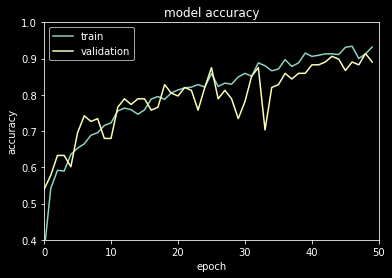

In [8]:
NUM_EPOCHS = 50 #YOUR CODE HERE#
STEPS_PER_EPOCH = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size

history = model.fit(
      train_generator,
      steps_per_epoch= STEPS_PER_EPOCH, 
      epochs = NUM_EPOCHS,
      verbose = 1,
      validation_data = validation_generator,
      validation_steps = STEP_SIZE_VALID
)

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

# Evaluate the model


In [9]:
model.evaluate(validation_generator,
steps=STEP_SIZE_VALID)

4/4 [==============================] - 0s 88ms/step - loss: 0.3498 - accuracy: 0.8906


[0.3497576117515564, 0.890625]

Since we are evaluating the model, we should treat the validation set as if it was the test set. So we should sample the images in the validation set exactly once(if you are planning to evaluate, you need to change the batch size of the valid generator to 1 or something that exactly divides the total num of samples in validation set)

# Predict the output
You need to reset the test_generator before whenever you call the predict_generator. This is important, if you forget to reset the test_generator you will get outputs in a weird order.

In [10]:
import numpy as np

STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)


 50/128 [==========>...................] - ETA: 0s

2022-05-12 01:01:25.829977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


128/128 [==============================] - 0s 3ms/step


## Labels
now predicted_class_indices has the predicted labels, but you can’t simply tell what the predictions are, because all you can see is numbers like 0,1,4,1,0,6…
You need to map the predicted labels with their unique ids such as filenames to find out what you predicted for which image.

In [11]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]


## Save to CSV

In [12]:
import pandas as pd

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,
                      "Predictions":predictions})
results.to_csv('./datasets/bean_disease/results.csv',index=False)